# Análise de Sindrome Gripal no Ceará

# 1 - Introdução

## 1.1 - Coleta de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

In [2]:
dataset = pd.read_csv('/home/jdspy/Documentos/datasets/sindrome_gripal_ceara.csv')

In [3]:
dataset.head()

,Outros,Distúrbios Gustativos,Dispneia,Assintomático,Distúrbios Olfativos,Dor de Garganta,Coriza,Dor de Cabeça,Febre,Tosse,Resultado
0,0,0,0,0,0,1,1,1,1,1,POSITIVO
1,0,0,0,0,0,1,1,0,0,0,NEGATIVO
2,0,0,0,0,0,1,1,0,1,0,NEGATIVO
3,0,0,0,0,0,1,1,0,0,1,POSITIVO
4,0,0,0,0,0,1,0,0,1,1,POSITIVO NÃO-ESPECIFICADO


## 1.2 - Primeiras Impressões

In [4]:
dataset

,Outros,Distúrbios Gustativos,Dispneia,Assintomático,Distúrbios Olfativos,Dor de Garganta,Coriza,Dor de Cabeça,Febre,Tosse,Resultado
0,0,0,0,0,0,1,1,1,1,1,POSITIVO
1,0,0,0,0,0,1,1,0,0,0,NEGATIVO
2,0,0,0,0,0,1,1,0,1,0,NEGATIVO
3,0,0,0,0,0,1,1,0,0,1,POSITIVO
4,0,0,0,0,0,1,0,0,1,1,POSITIVO NÃO-ESPECIFICADO
...,...,...,...,...,...,...,...,...,...,...,...
271671,0,1,0,0,0,1,1,0,0,1,POSITIVO
271672,1,0,0,0,0,0,1,1,1,0,NEGATIVO
271673,0,0,1,0,0,0,1,1,1,0,POSITIVO NÃO-ESPECIFICADO
271674,0,0,0,1,0,0,0,0,0,0,NEGATIVO


In [5]:
total_de_classes = dataset["Resultado"].value_counts(); total_de_classes

NEGATIVO                     141887
POSITIVO                      90988
POSITIVO NÃO-ESPECIFICADO     38801
Name: Resultado, dtype: int64

# 2 - Análise Exploratória de Dados

## 2.1 - Separação de Classes

In [6]:
matriz = dataset.groupby('Resultado').sum(); matriz

,Outros,Distúrbios Gustativos,Dispneia,Assintomático,Distúrbios Olfativos,Dor de Garganta,Coriza,Dor de Cabeça,Febre,Tosse
Resultado,,,,,,,,,,
NEGATIVO,18195,4449,12536,31989,4127,55290,54943,51966,50086,71038
POSITIVO,12678,4583,8151,7712,4299,45936,45485,42323,44557,57921
POSITIVO NÃO-ESPECIFICADO,8236,1136,3603,3909,1118,17513,17729,15140,16956,23250


In [7]:
i = 0
for classe in total_de_classes:
    matriz.loc[total_de_classes.index[i]] = matriz.loc[total_de_classes.index[i]] / classe
    i += 1

In [10]:
matriz * 100

,Outros,Distúrbios Gustativos,Dispneia,Assintomático,Distúrbios Olfativos,Dor de Garganta,Coriza,Dor de Cabeça,Febre,Tosse
Resultado,,,,,,,,,,
NEGATIVO,12.823585,3.135594,8.835200,22.545406,2.908653,38.967629,38.723068,36.624920,35.299922,50.066602
POSITIVO,13.933706,5.036928,8.958324,8.475843,4.724799,50.485778,49.990109,46.514925,48.970194,63.657845
POSITIVO NÃO-ESPECIFICADO,21.226257,2.927760,9.285843,10.074483,2.881369,45.135435,45.692121,39.019613,43.699905,59.921136


<AxesSubplot:title={'center':'Sintomas da Sindrome Gripal em casos Positivos'}, xlabel='Porcentagem dos casos', ylabel='Sintoma'>

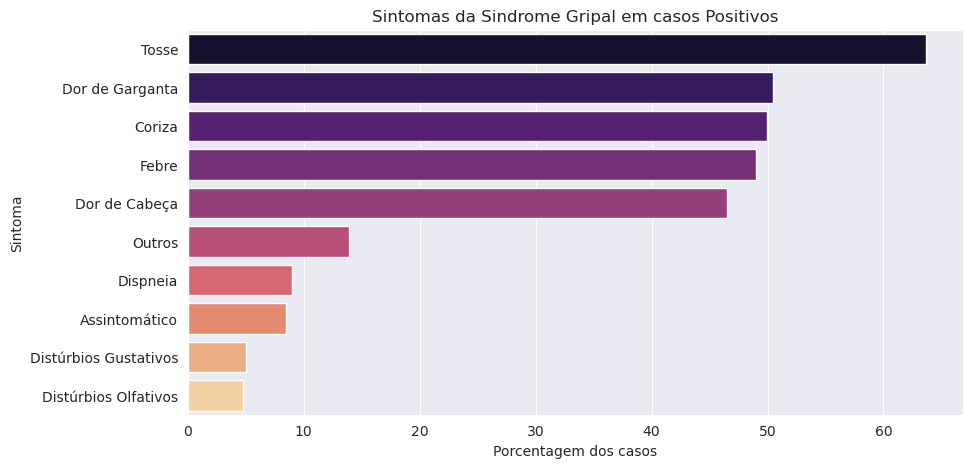

In [11]:
positivos = dataset.query('Resultado == "POSITIVO"') 

sintomas_positivos = positivos.iloc[:, :-1].sum() / len(positivos) * 100

sintomas_positivos = sintomas_positivos.sort_values(ascending=False)

sns.set_style('darkgrid')

plt.figure(figsize=(10, 5))
plt.title('Sintomas da Sindrome Gripal em casos Positivos')
plt.xlabel('Porcentagem dos casos')
plt.ylabel('Sintoma')


sns.barplot(y = sintomas_positivos.index, x = sintomas_positivos.values, palette='magma')

<AxesSubplot:title={'center':'Sintomas da Sindrome Gripal em casos Negativos'}, xlabel='Porcentagem dos casos', ylabel='Sintoma'>

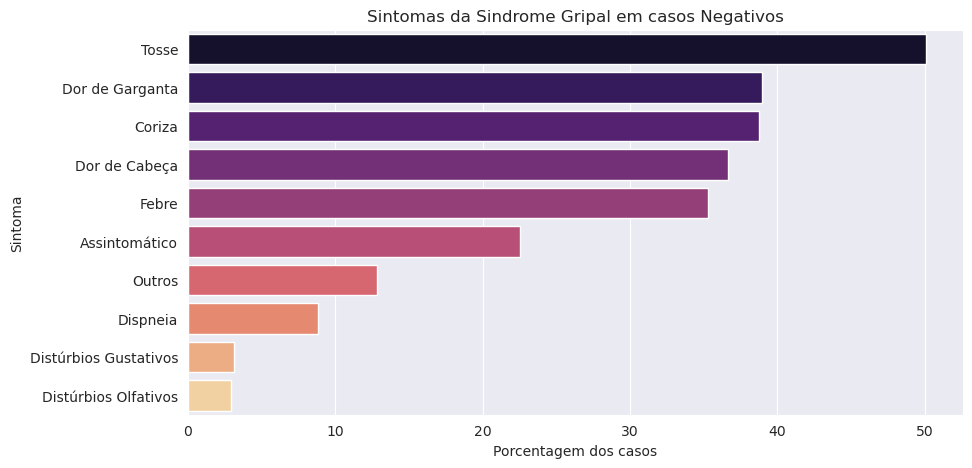

In [12]:
negativos = dataset.query('Resultado == "NEGATIVO"') 

sintomas_negativos = negativos.iloc[:, :-1].sum() / len(negativos) * 100

sintomas_negativos = sintomas_negativos.sort_values(ascending=False)

sns.set_style('darkgrid')

plt.figure(figsize=(10, 5))
plt.title('Sintomas da Sindrome Gripal em casos Negativos')
plt.xlabel('Porcentagem dos casos')
plt.ylabel('Sintoma')


sns.barplot(y = sintomas_negativos.index, x = sintomas_negativos.values, palette='magma')

In [13]:
sintomas_positivos

Tosse                    63.657845
Dor de Garganta          50.485778
Coriza                   49.990109
Febre                    48.970194
Dor de Cabeça            46.514925
Outros                   13.933706
Dispneia                  8.958324
Assintomático             8.475843
Distúrbios Gustativos     5.036928
Distúrbios Olfativos      4.724799
dtype: float64

In [14]:
sintomas_negativos

Tosse                    50.066602
Dor de Garganta          38.967629
Coriza                   38.723068
Dor de Cabeça            36.624920
Febre                    35.299922
Assintomático            22.545406
Outros                   12.823585
Dispneia                  8.835200
Distúrbios Gustativos     3.135594
Distúrbios Olfativos      2.908653
dtype: float64

In [15]:
sintomas = pd.concat([sintomas_positivos.sort_index(), sintomas_negativos.sort_index()], axis=1)

In [16]:
sintomas.columns = ["Negativos", "Positivos"]

In [17]:
sintomas

,Negativos,Positivos
Assintomático,8.475843,22.545406
Coriza,49.990109,38.723068
Dispneia,8.958324,8.835200
Distúrbios Gustativos,5.036928,3.135594
Distúrbios Olfativos,4.724799,2.908653
Dor de Cabeça,46.514925,36.624920
Dor de Garganta,50.485778,38.967629
Febre,48.970194,35.299922
Outros,13.933706,12.823585
Tosse,63.657845,50.066602


In [18]:
sintomas = sintomas.sort_values(by='Positivos', ascending=False)

In [19]:
plt.show()

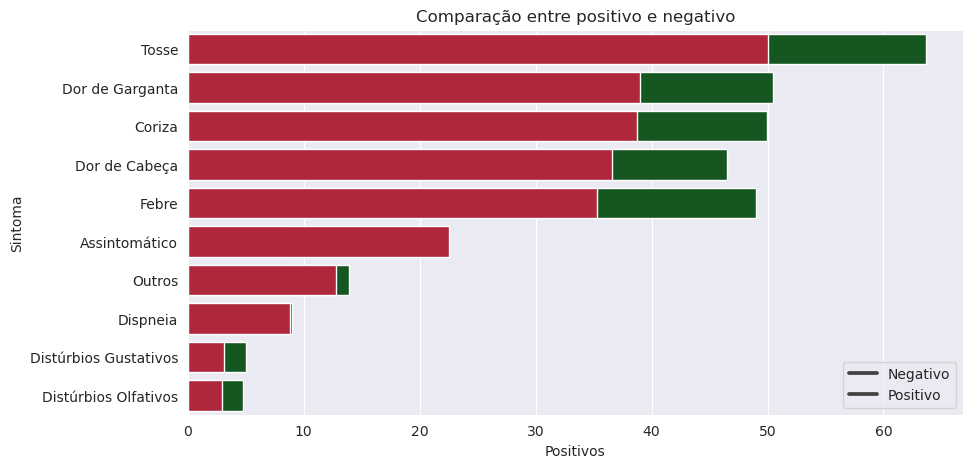

In [20]:
plt.figure(figsize=(10, 5))
plt.title('Comparação entre positivo e negativo')
plt.xlabel('Porcentagem dos casos')
plt.ylabel('Sintoma')

sns.barplot(y=sintomas.index, x=sintomas.Negativos, color='#0b611a')
sns.barplot(y=sintomas.index, x=sintomas.Positivos, color='#c4102b')

plt.legend(['Negativo', 'Positivo'])

plt.show()

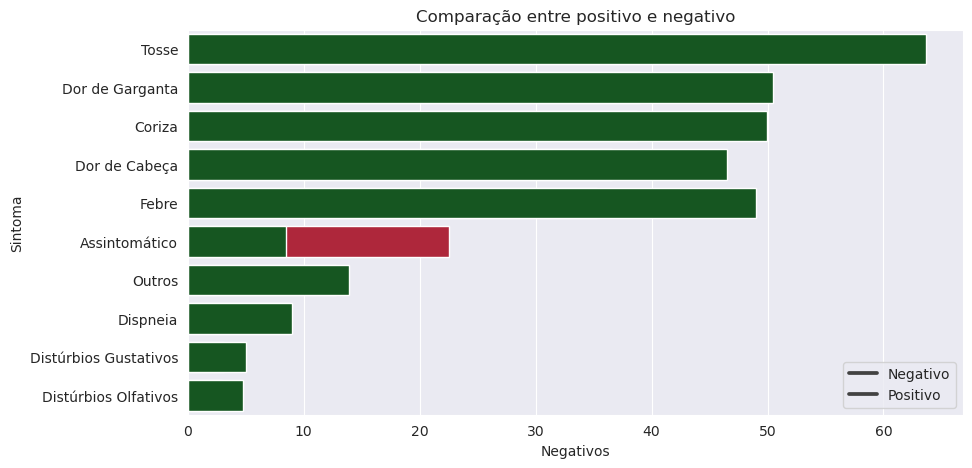

In [21]:
plt.figure(figsize=(10, 5))
plt.title('Comparação entre positivo e negativo')
plt.xlabel('Porcentagem dos casos')
plt.ylabel('Sintoma')

sns.barplot(y=sintomas.index, x=sintomas.Positivos, color='#c4102b')
sns.barplot(y=sintomas.index, x=sintomas.Negativos, color='#0b611a')

plt.legend(['Negativo', 'Positivo'])

plt.show()

# 3 - Modelagem

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [23]:
x = dataset.iloc[:, :-1]
y = dataset['Resultado']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, stratify=y)

In [25]:
def avaliar_modelo(modelo):
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)
    
    return accuracy_score(y_test, y_pred)

In [26]:
avaliar_modelo(DummyClassifier())

0.5222691735744048

In [28]:
avaliar_modelo(DecisionTreeClassifier())

0.5241684948247177

In [ ]:
avaliar_modelo(KNeighborsClassifier())

In [ ]:
avaliar_modelo(SVC())